### ***TẠO DATASET MỚI TỪ DATASET CÓ SẴN VÀ HUẤN LUYỆN MODEL TRÊN NÓ***

##### TẢI VÀ LỌC NHỮNG DỮ LIỆU MUỐN XỬ LÝ (Ở ĐÂY CHỌN RA 3/101 CLASS CỦA TẬP FOOD101)

In [1]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/") # Tạo đường dẫn đến thư mục data
image_path = data_path / "pizza_steak_sushi" # tạo đường dẫn từ data đến thư mục pizza_steak_sushi

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True) # tạo thư mục cha nếu chưa có
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        # tải thư mục pizza_steak_sushi.zip về
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content) # ghi dữ liệu vào file zip vừa tải về vào file data/pizza_steak_sushi.zip

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path) # giải nén toàn bộ vào file data/pizza_steak_sushi

data\pizza_steak_sushi directory exists.


In [2]:
train_dir = image_path / "train"
test_dir = image_path / "test"

đường dẫn tới ảnh ngẫu nhiên: <data\pizza_steak_sushi\test\sushi\2394442.jpg>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x408 at 0x211FA052B30>
Class: sushi,
 img path: data\pizza_steak_sushi\test\sushi\2394442.jpg,
 img H and W: (408, 512)


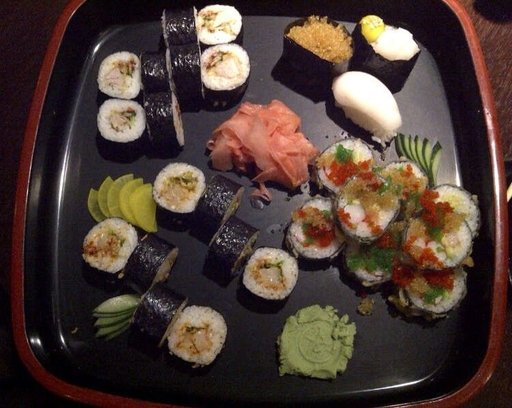

In [57]:
from PIL import Image as PILImage
from torchvision.tv_tensors import Image
import random
random.seed(42)
img_path_list = list(image_path.glob("*/*/*.jpg"))# data/pizza_steak_sushi/*test/*pizza/*.jpg
                              # hàm global: iterate qua nhánh thư mục và chọn ra các file có cấu trúc 
img_path_list # list chứa các file jpg trong thư mục data
random_img = random.choice(img_path_list) # chọn ra ảnh ngẫu nhiên
print(f"đường dẫn tới ảnh ngẫu nhiên: <{random_img}>")
img_class = (random_img.parent).stem # vào thư mục cha chứa random_img và trả về tên của thư mục đó (pizza hoặc sushi) (hàm stem)
JPEG_img = PILImage.open(random_img) # mở ảnh bằng đường dẫn và lưu ảnh vào img
print(JPEG_img)
print(f"Class: {img_class},\n img path: {random_img},\n img H and W: {JPEG_img.height, JPEG_img.width}")
img = Image(JPEG_img)
JPEG_img

#### ***BẮT ĐẦU TẠO MODEL VÀ XỬ LÝ***
##### ***TRANSFORM ẢNH SANG TENSOR, TẠO DATASET VÀ DATALOADER***

In [58]:
from torchvision import datasets #  
from torchvision.transforms import v2 as T # thư viện Transforms
from torch.utils.data import DataLoader

##### ***KHỞI TẠO TRANSFORMER***

In [27]:
transformer = T.Compose([
    T.Resize(size = (64,64)),
    T.RandomVerticalFlip(p=0.5),
    T.ToTensor()
])
transformed_img = transformer(JPEG_img)
JPEG_img.height, JPEG_img.width, transformed_img.shape

d:\Python 10\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


(408, 512, torch.Size([3, 64, 64]))

In [31]:
tv_transform = T.Compose([
    T.Resize(size = (64,64)),
    T.RandomVerticalFlip(p=0.5)
])
transformed_tv_img = tv_transform(tv_img)
transformed_tv_img.shape

torch.Size([3, 64, 64])

##### ***TẠO DATALOADER***

In [18]:
from torchvision.datasets import ImageFolder 
bs=12
train_data = ImageFolder(root = train_dir, transform=transformer)
train_DL = DataLoader(train_data, batch_size=bs, shuffle=True)

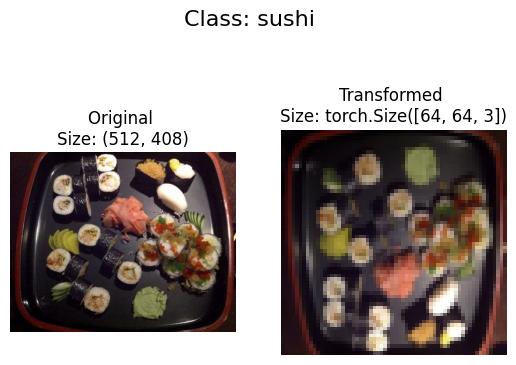

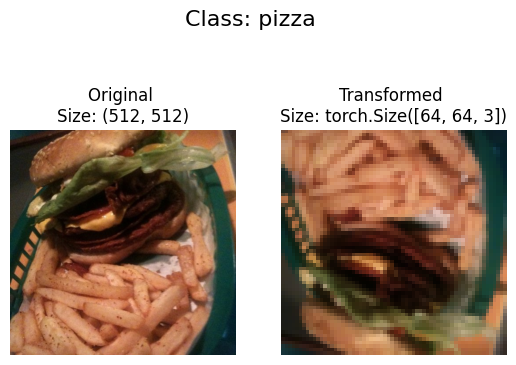

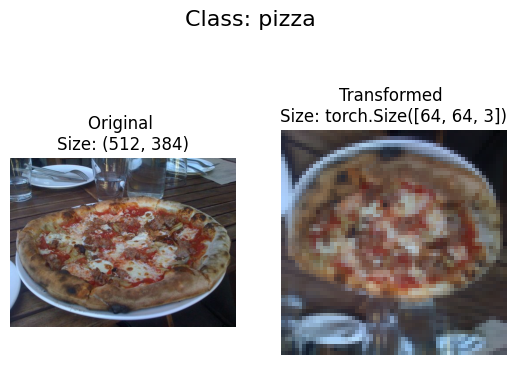

In [ ]:
import matplotlib.pyplot as plt
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with PILImage.open(image_path) as f: # mở ảnh bằng class PILImage, f lúc này chính là ảnh được đọc từ PILImage.open()
            
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transformer(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(img_path_list, 
                        transform=transformer, 
                        n=3)